
**Importing Libraries**

In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
data_train = pd.read_csv("/content/churn-bigml-80.csv")

In [31]:
data_test = pd.read_csv("/content/churn-bigml-20.csv")

**Exploratory Data Analysis (EDA)**

In [32]:
data_train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [33]:
data_train.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [34]:
data_test.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [35]:
data_train.isnull().sum()

,0
State,0
Account length,0
Area code,0
International plan,0
Voice mail plan,0
Number vmail messages,0
Total day minutes,0
Total day calls,0
Total day charge,0
Total eve minutes,0


In [36]:
data_train.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [37]:
data_train.shape

(2666, 20)

In [40]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [41]:
data_train['State'].nunique()

51

<Axes: ylabel='count'>

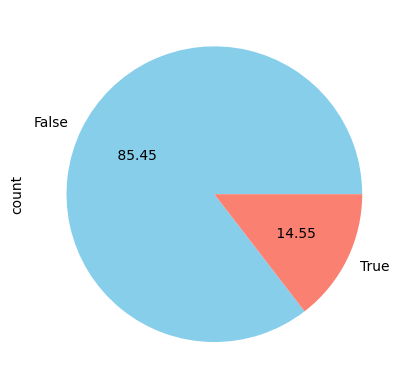

In [45]:
# Churn Distribution
data_train['Churn'].value_counts().plot(kind='pie',autopct='% .2f',colors=['skyblue', 'salmon'])

In [46]:
data_train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Normalization :
We'll normalize numerical features using Min-Max scaling to bring all values into the range [0, 1].



In [18]:
# Numerical columns to normalize
num_cols = [
    'Account length', 'Number vmail messages', 'Total day minutes',
    'Total day calls', 'Total day charge', 'Total eve minutes',
    'Total eve calls', 'Total eve charge', 'Total night minutes',
    'Total night calls', 'Total night charge', 'Total intl minutes',
    'Total intl calls', 'Total intl charge', 'Customer service calls'
]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler on training data and transform both train and test datasets
data_train[num_cols] = scaler.fit_transform(data_train[num_cols])
data_test[num_cols] = scaler.transform(data_test[num_cols])

# Create new features in both datasets
for df in [data_train, data_test]:
    df['Average Revenue per Day'] = (
        df['Total day charge'] + df['Total eve charge'] +
        df['Total night charge'] + df['Total intl charge']
    ) / 30  # Assuming 30 days in a month

    df['CLV'] = df['Average Revenue per Day'] * df['Account length']
    df.drop(columns=['Average Revenue per Day'], inplace=True)

# Check updated training data
print(data_train.head())

  State  Account length  Area code International plan Voice mail plan  \
0    KS        0.524793        415                 No             Yes   
1    OH        0.438017        415                 No             Yes   
2    NJ        0.561983        415                 No              No   
3    OH        0.342975        408                Yes              No   
4    OK        0.305785        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                   0.50           0.755701          0.68750   
1                   0.52           0.460661          0.76875   
2                   0.00           0.693843          0.71250   
3                   0.00           0.853478          0.44375   
4                   0.00           0.475200          0.70625   

   Total day charge  Total eve minutes  ...  Total eve charge  \
0          0.755701           0.542755  ...          0.542866   
1          0.460597           0.537531  ...   

In [19]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Step 1: Encode categorical variables in both datasets
categorical_cols = ['International plan', 'Voice mail plan', 'Churn']

for col in categorical_cols:
    le = LabelEncoder()
    data_train[col] = le.fit_transform(data_train[col])
    data_test[col] = le.transform(data_test[col])

# Step 2: Separate features and target
X_train = data_train.drop(columns=['Churn', 'State'])
y_train = data_train['Churn']

X_test = data_test.drop(columns=['Churn', 'State'])
y_test = data_test['Churn']

# Step 3: Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Train Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Step 5: Evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

# Evaluate Random Forest
print("Random Forest Results:")
evaluate_model(rf_model, X_test, y_test)

# Evaluate Gradient Boosting
print("\nGradient Boosting Results:")
evaluate_model(gb_model, X_test, y_test)


Random Forest Results:
Accuracy: 0.9610
Precision: 0.9726
Recall: 0.7474
F1 Score: 0.8452
ROC-AUC Score: 0.9127

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.96      1.00      0.98       572
       Churn       0.97      0.75      0.85        95

    accuracy                           0.96       667
   macro avg       0.97      0.87      0.91       667
weighted avg       0.96      0.96      0.96       667


Gradient Boosting Results:
Accuracy: 0.9520
Precision: 0.9091
Recall: 0.7368
F1 Score: 0.8140
ROC-AUC Score: 0.9303

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.96      0.99      0.97       572
       Churn       0.91      0.74      0.81        95

    accuracy                           0.95       667
   macro avg       0.93      0.86      0.89       667
weighted avg       0.95      0.95      0.95       667



In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train models again with balanced data
rf_model.fit(X_train_balanced, y_train_balanced)
gb_model.fit(X_train_balanced, y_train_balanced)

# Evaluate models with test data
print("Random Forest Results (after SMOTE):")
evaluate_model(rf_model, X_test, y_test)

print("\nGradient Boosting Results (after SMOTE):")
evaluate_model(gb_model, X_test, y_test)


Random Forest Results (after SMOTE):
Accuracy: 0.9415
Precision: 0.7857
Recall: 0.8105
F1 Score: 0.7979
ROC-AUC Score: 0.9109

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.97      0.96      0.97       572
       Churn       0.79      0.81      0.80        95

    accuracy                           0.94       667
   macro avg       0.88      0.89      0.88       667
weighted avg       0.94      0.94      0.94       667


Gradient Boosting Results (after SMOTE):
Accuracy: 0.9310
Precision: 0.7379
Recall: 0.8000
F1 Score: 0.7677
ROC-AUC Score: 0.9195

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.97      0.95      0.96       572
       Churn       0.74      0.80      0.77        95

    accuracy                           0.93       667
   macro avg       0.85      0.88      0.86       667
weighted avg       0.93      0.93      0.93       667



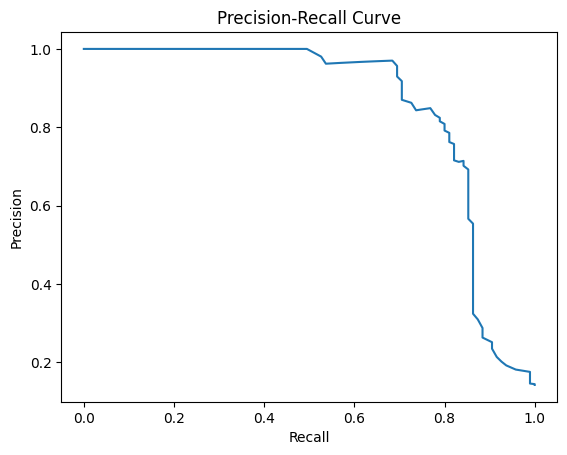

Optimal Threshold: 0.58


In [24]:
from sklearn.metrics import precision_recall_curve

y_proba = rf_model.predict_proba(X_test)[:, 1]  # Use Gradient Boosting probabilities for gb_model
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# Plot Precision-Recall curve
import matplotlib.pyplot as plt
plt.plot(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Choose an optimal threshold (e.g., maximize F1 score)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
optimal_idx = f1_scores.argmax()
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the evaluation function
def evaluate_model_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")

# Recalculate metrics at the optimal threshold
evaluate_model_metrics(y_test, y_pred_optimal)


Accuracy: 0.9475
Precision: 0.8488
Recall: 0.7684
F1 Score: 0.8066
ROC-AUC Score: 0.8728
